## <font color=green>Day-9</font>

- Our topic of discussion is <font color=green size="4">**Logistic Regression for Classification**</font>
- Dataset That we would be using : Breast Cancer Wisconsin
    - The Dataset has already been downloaded and is placed in the folder ./Dataset/Classification/
    - Incase if you face any problems, you can download that dataset from kaggle using the link https://www.kaggle.com/datasets/ashydv/advertising-dataset    
    
- Sections
    0. **Learning Contents about Logistic Regression Classification**
    1. Importing Headers
    2. Importing Data
    3. Data Exploration=
    5. EDA
    7. Data Preparation
    9. Modelling
    10. Model Evaluation

    
    Conclusion
- Further Experimenting can be done using Cross Validation

### Author of the Document : <font color="Green">Karnati Sai Venkata Giri</font>
### Feel free to reach me out at : <font color="Green">karnatisaivenkatagiri@gmail.com</font>

## Learning : Logistic Regression

1. What is Logistic Regression? : [Link](https://www.youtube.com/watch?v=vN5cNN2-HWE)
2. Perfect blog on Logistic Regression  with mathematical explanation for Cost Function: [Link](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)


In [1]:
# Computation Libraries
import numpy as np
import pandas as pd

# Stats Libraries
import statistics as stats

# Visualisazition Libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Modelling Libraries
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LogisticRegression

# Evaluation Metrics Libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# Cross Validation Libraries
from sklearn.model_selection import cross_val_score

## 2. Importing Data

In [2]:
# Importing Data
df = pd.read_csv("./Dataset/Classification/advertising.csv")
print("The shape of the dataset is {0} rows and {1} cols".format(df.shape[0],df.shape[1]))
print(list(df.columns))
df.head(5)

The shape of the dataset is 1000 rows and 10 cols
['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country', 'Timestamp', 'Clicked on Ad']


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


### <font color=green>Inferences</font>
- We have 569 rows and 10 features
- Our Target Feature is "Clicked on Ad"
- 6 Numerical Type, 3 String type, 1 Date Object
- 'Ad Topic Line', 'City', 'Country', 'Timestamp' might not influence the output if they are random. Need to confirm after looking at the unique values


## 3. Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
df.nunique()

Daily Time Spent on Site     900
Age                           43
Area Income                 1000
Daily Internet Usage         966
Ad Topic Line               1000
City                         969
Male                           2
Country                      237
Timestamp                   1000
Clicked on Ad                  2
dtype: int64

### <font color=green>Inferences</font>
- The features 'Ad Topic Line', 'City', 'Country', 'Timestamp' clearly are varying a lot and are of vast categories

In [5]:
# Checking for null values
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

## 4. EDA

In [6]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


<AxesSubplot:>

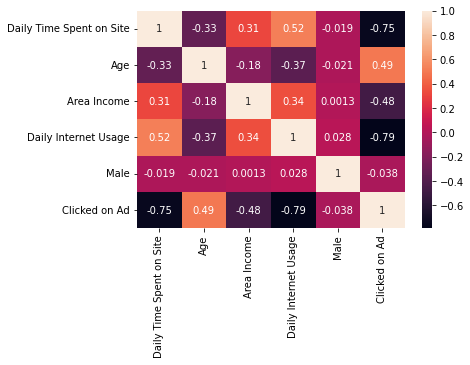

In [7]:
sns.heatmap(df.corr(),annot=True)

### <font color=green>Inferences</font>
- Among the features 'Daily Internet Usage' and 'Daily Time Spent on Site' are more correlated to the output. We cant confirm if they are actually the casue but we can see a pattern of decrement on increment of 'Clicked on Ad'

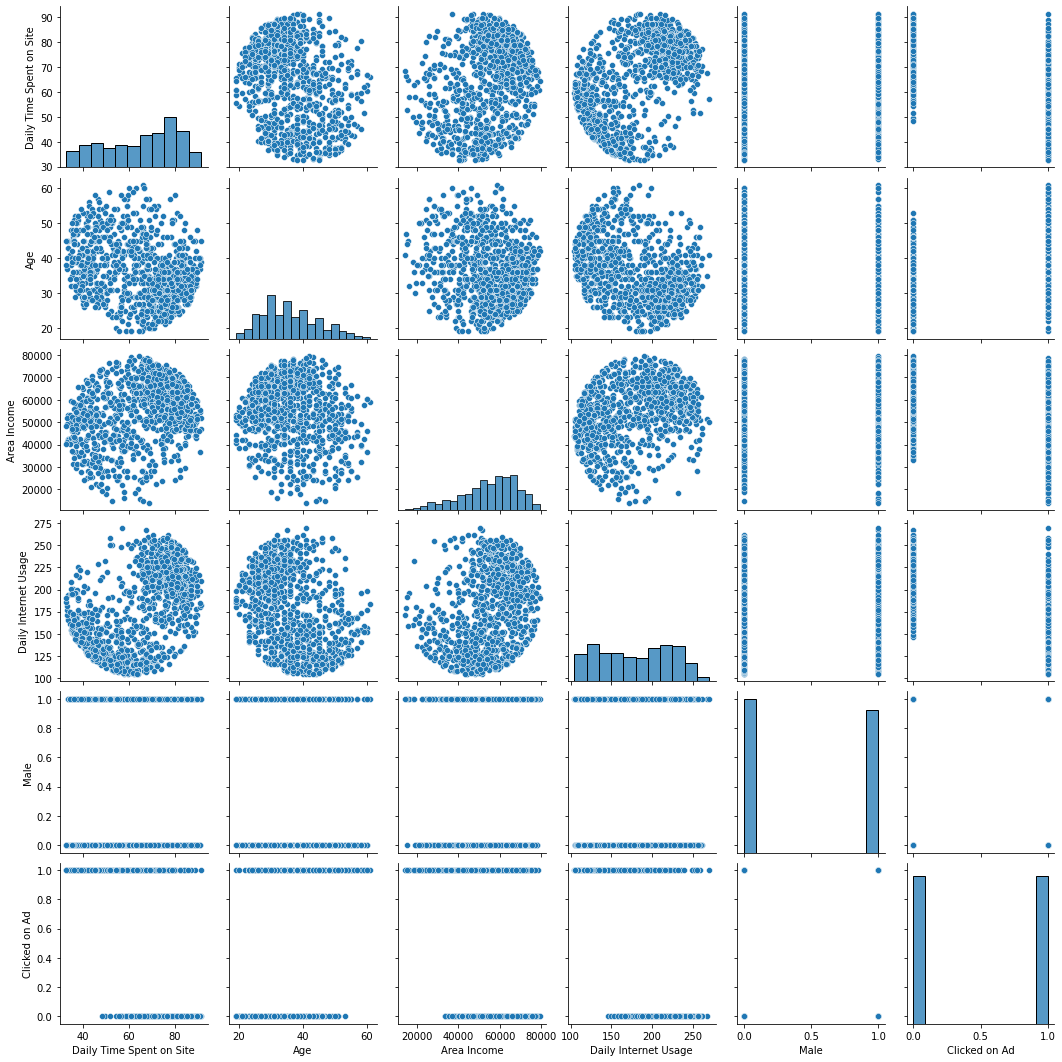

In [8]:
sns.pairplot(df)

### <font color=green>Inferences</font>
- The data seemed to pretty randomly distributed,. Not much info can be extracted from Pair Plots

## 5. Data Preparation

In [9]:
X = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage','Male']]
Y = df['Clicked on Ad']

train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size = 0.33, random_state = 33)
print(X.shape, Y.shape,train_x.shape,test_x.shape,train_y.shape,test_y.shape)

(1000, 5) (1000,) (670, 5) (330, 5) (670,) (330,)


## 6. Modelling

In [10]:
model = LogisticRegression()
model.fit(train_x,train_y)

LogisticRegression()

## 7. Model Evaluation

In [11]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)
pred_test

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,

In [12]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(train_y, pred_train)))
print('Testing-set accuracy score: {0:0.4f}'. format(accuracy_score(test_y, pred_test)))

Training-set accuracy score: 0.9075
Testing-set accuracy score: 0.8758


In [13]:
print(classification_report(test_y, pred_test))

              precision    recall  f1-score   support

           0       0.84      0.94      0.88       167
           1       0.93      0.81      0.87       163

    accuracy                           0.88       330
   macro avg       0.88      0.87      0.88       330
weighted avg       0.88      0.88      0.88       330



In [14]:
cnf_matrix = confusion_matrix(test_y, pred_test, labels=[1,0])
cnf_matrix

array([[132,  31],
       [ 10, 157]])

In [15]:
scores = cross_val_score(model, train_x, train_y, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.94029851 0.86567164 0.98507463 0.89552239 0.95522388 0.89552239
 0.92537313 0.97014925 0.92537313 0.92537313]


/home/unknown/anaconda3/envs/GPU/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/unknown/anaconda3/envs/GPU/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

<img src="./Data/thank.jpg"/>
---------------------------------------------------------------------------------------- END OF NOTEBOOK -------------------------------------------------------------------------------------